Загрузка библиотек:

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Загрузка датасета:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Проверка датасета:

In [3]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

print(test_images.shape)
print(len(test_labels))
print(test_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


Преобразование данных:

In [4]:
train_images = (train_images / 255)*2-1
test_images = (test_images / 255)*2-1

train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))

Создание и компиляция модели:

In [5]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.utils import to_categorical

In [6]:
model = Sequential([
    Dense(512, activation = 'relu', input_shape=(784,)),
    Dense(512, activation = 'linear'),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Обучение модели и проверка метрик:

In [7]:
hh = model.fit(train_images, to_categorical(train_labels, 10), epochs=5, batch_size = 2000, validation_split = 0.2, verbose = 0)
hh.history['accuracy'][-1], hh.history['val_accuracy'][-1]

(0.8761666417121887, 0.8701666593551636)

<function matplotlib.pyplot.show(*args, **kw)>

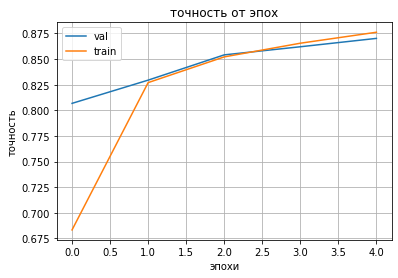

In [8]:
plt.plot(hh.history['val_accuracy'], label = 'val')
plt.plot(hh.history['accuracy'], label = 'train')
plt.xlabel('эпохи')
plt.ylabel('точность')
plt.legend()
plt.grid('On')
plt.title('точность от эпох')
plt.show

Попробуем улучшить модель:

Увеличим количество эпох и размер пакета:

In [9]:
model2 = Sequential([
    Dense(512, activation = 'relu', input_shape=(784,)),
    Dense(512, activation = 'linear'),
    Dense(10, activation = 'softmax')
])

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hh2 = model2.fit(train_images, to_categorical(train_labels, 10), epochs=30, batch_size = 5000, validation_split = 0.2, verbose = 0)
hh2.history['accuracy'][-1], hh2.history['val_accuracy'][-1]

(0.9334375262260437, 0.8827499747276306)

<function matplotlib.pyplot.show(*args, **kw)>

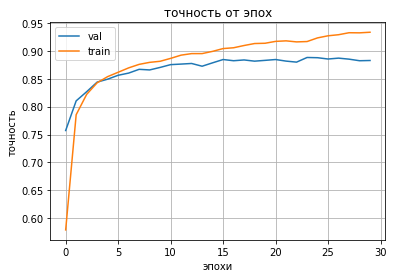

In [10]:
plt.plot(hh2.history['val_accuracy'], label = 'val')
plt.plot(hh2.history['accuracy'], label = 'train')
plt.xlabel('эпохи')
plt.ylabel('точность')
plt.legend()
plt.grid('On')
plt.title('точность от эпох')
plt.show

Точность новой модели возросла. Попробуем дополнительно доучить модель для улучшения результата:

In [11]:
hh3 = model2.fit(train_images, to_categorical(train_labels, 10), epochs=30, batch_size = 5000, validation_split = 0.2, verbose = 0)
hh3.history['accuracy'][-1], hh3.history['val_accuracy'][-1]

(0.9625625014305115, 0.8793333172798157)

<function matplotlib.pyplot.show(*args, **kw)>

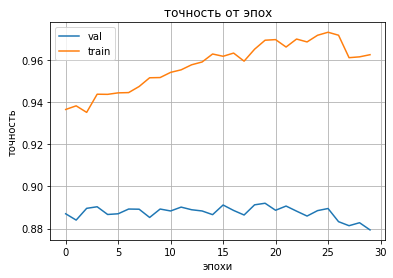

In [12]:
plt.plot(hh3.history['val_accuracy'], label = 'val')
plt.plot(hh3.history['accuracy'], label = 'train')
plt.xlabel('эпохи')
plt.ylabel('точность')
plt.legend()
plt.grid('On')
plt.title('точность от эпох')
plt.show

Как можно видеть, валидационная точность стабилизировалась и вышла на плато. Дальнейшее дообучение модели нецелесообразно.

In [13]:
print(hh.history['accuracy'][-1], hh.history['val_accuracy'][-1])
print(hh2.history['accuracy'][-1], hh2.history['val_accuracy'][-1])
print(hh3.history['accuracy'][-1], hh3.history['val_accuracy'][-1])

0.8761666417121887 0.8701666593551636
0.9334375262260437 0.8827499747276306
0.9625625014305115 0.8793333172798157


In [14]:
probability_model = tf.keras.Sequential([model2, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [15]:
print(np.argmax(predictions[:25], axis = 1))
print(test_labels[:25])

[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 4 8 0 2 5 7 5 1]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1]


Вывод: увеличения точности можно достигнуть путем изменения гиперпараметров и дообучением модели. 

Построение модели для датасета Boston:

Загрузка данных:

In [16]:
boston = tf.keras.datasets.boston_housing
(X_train, y_train), (X_test, y_test) = boston.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

57026/57026 [==============================] - 0s 0us/step
(404, 13)
(404,)
(102, 13)
(102,)


Нормализация данных:

In [17]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

Построение модели:

In [18]:
model_b = tf.keras.Sequential([
    Dense(13, activation = 'relu', input_shape=(13,)),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'linear')
])

model_b.compile(optimizer=tf.optimizers.Adam(learning_rate=0.005), loss='mse', metrics=['mae'])

model_b.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 13)                182       
                                                                 
 dense_7 (Dense)             (None, 256)               3584      
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 4,023
Trainable params: 4,023
Non-trainable params: 0
_________________________________________________________________


Обучение модели и проверка метрик:

In [19]:
hb = model_b.fit(X_train, y_train, epochs=300, batch_size = 2000, validation_split = 0.2, verbose = 0)

MAE:2.2954261302948, VAL_MAE:2.6560020446777344, LOSS:11.566868782043457, VAL_LOSS:15.353965759277344


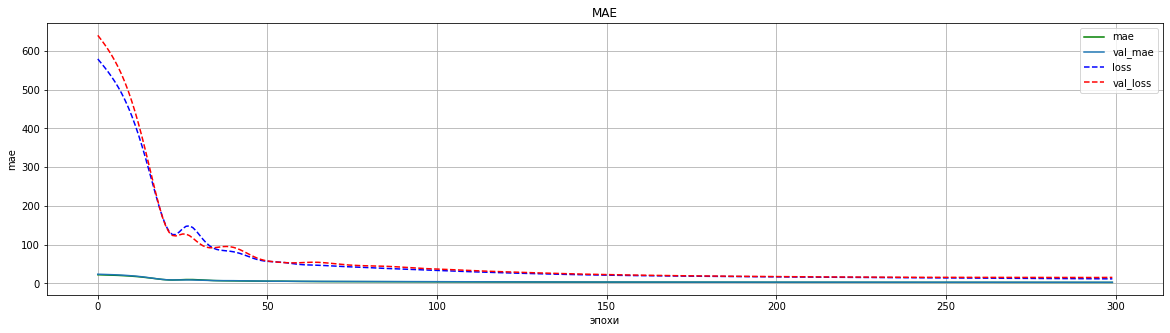

In [20]:
plt.figure(figsize=(20,5))
plt.plot(hb.history['mae'],'g', label = 'mae')
plt.plot(hb.history['val_mae'], label = 'val_mae')
plt.plot(hb.history['loss'],'--b', label = 'loss')
plt.plot(hb.history['val_loss'],'--r', label = 'val_loss')
plt.xlabel('эпохи')
plt.ylabel('mae')
plt.legend()
plt.grid('On')
plt.title('MAE')
plt.show

print(f'MAE:{hb.history["mae"][-1]}, VAL_MAE:{hb.history["val_mae"][-1]}, LOSS:{hb.history["loss"][-1]}, VAL_LOSS:{hb.history["val_loss"][-1]}') 

In [21]:
preds = model_b.predict(X_test)

print(y_test[:10]) 
print(preds[:10].flatten().round(1))

4/4 [==============================] - 0s 3ms/step
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]
[10.9 16.7 21.3 30.6 24.1 18.9 29.1 23.7 20.5 22.6]


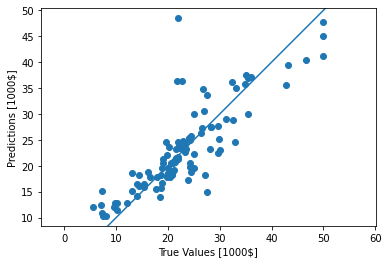

In [22]:
plt.scatter(y_test, preds)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

Как видно из результатов предказаний, метрик и графиков, полученная модель неплохо справляется с задачей регрессии. Попробуем ее улучшить.

Построим еще одну модель с измененными параметрами:

Изменим learning rate оптимайзера Adam в сторону увеличения:

MAE:1.734480619430542, VAL_MAE:2.4098267555236816, LOSS:5.533041477203369, VAL_LOSS:11.753429412841797


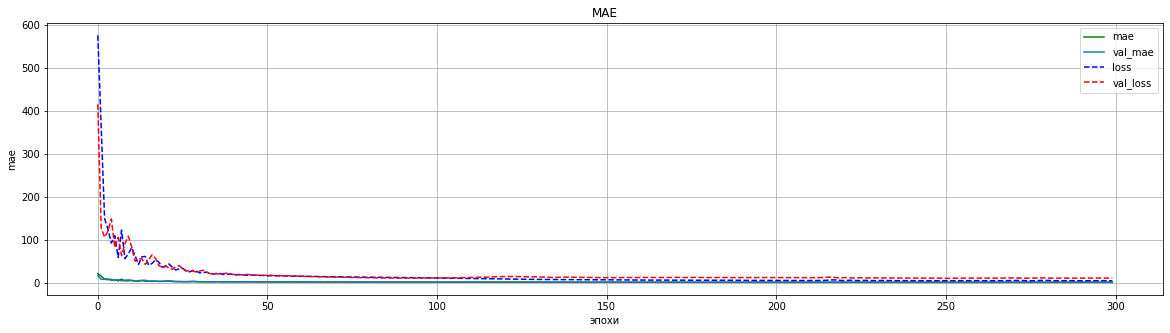

In [23]:
model_b2 = tf.keras.Sequential([
    Dense(13, activation = 'relu', input_shape=(13,)),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'linear')
])
model_b2.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mse', metrics=['mae'])
hb2 = model_b2.fit(X_train, y_train, epochs=300, batch_size = 2000, validation_split = 0.2, verbose = 0)

plt.figure(figsize=(20,5))
plt.plot(hb2.history['mae'],'g', label = 'mae')
plt.plot(hb2.history['val_mae'], label = 'val_mae')
plt.plot(hb2.history['loss'],'--b', label = 'loss')
plt.plot(hb2.history['val_loss'],'--r', label = 'val_loss')
plt.xlabel('эпохи')
plt.ylabel('mae')
plt.legend()
plt.grid('On')
plt.title('MAE')
plt.show

print(f'MAE:{hb2.history["mae"][-1]}, VAL_MAE:{hb2.history["val_mae"][-1]}, LOSS:{hb2.history["loss"][-1]}, VAL_LOSS:{hb2.history["val_loss"][-1]}') 

Увеличение скорости обучения дало улучшение результатов по метрикам. Увеличим его еще раз:

MAE:6.607362747192383, VAL_MAE:6.552398204803467, LOSS:84.15693664550781, VAL_LOSS:86.96839141845703


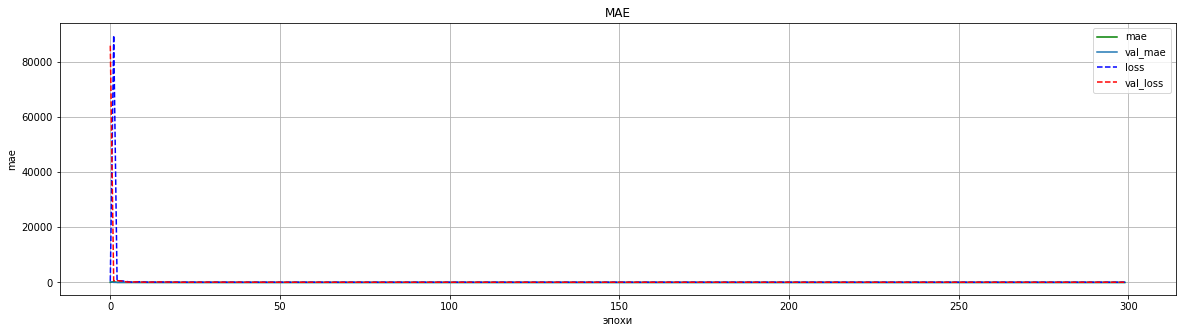

In [24]:
model_b3 = tf.keras.Sequential([
    Dense(13, activation = 'relu', input_shape=(13,)),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'linear')
])
model_b3.compile(optimizer=tf.optimizers.Adam(learning_rate=0.5), loss='mse', metrics=['mae'])
hb3 = model_b3.fit(X_train, y_train, epochs=300, batch_size = 2000, validation_split = 0.2, verbose = 0)

plt.figure(figsize=(20,5))
plt.plot(hb3.history['mae'],'g', label = 'mae')
plt.plot(hb3.history['val_mae'], label = 'val_mae')
plt.plot(hb3.history['loss'],'--b', label = 'loss')
plt.plot(hb3.history['val_loss'],'--r', label = 'val_loss')
plt.xlabel('эпохи')
plt.ylabel('mae')
plt.legend()
plt.grid('On')
plt.title('MAE')
plt.show

print(f'MAE:{hb3.history["mae"][-1]}, VAL_MAE:{hb3.history["val_mae"][-1]}, LOSS:{hb3.history["loss"][-1]}, VAL_LOSS:{hb3.history["val_loss"][-1]}') 

Результат по метрикам не очень хороший. Попробуем уменьшить количество эпох:

MAE:13.254547119140625, VAL_MAE:18.523340225219727, LOSS:256.60418701171875, VAL_LOSS:423.26995849609375


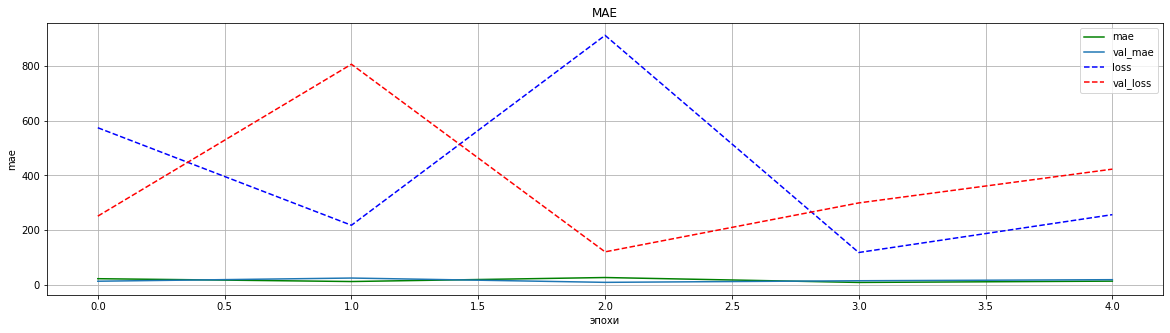

In [30]:
model_b4 = tf.keras.Sequential([
    Dense(13, activation = 'relu', input_shape=(13,)),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'linear')
])
model_b4.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mse', metrics=['mae'])
hb4 = model_b4.fit(X_train, y_train, epochs=5, batch_size = 2000, validation_split = 0.2, verbose = 0)

plt.figure(figsize=(20,5))
plt.plot(hb4.history['mae'],'g', label = 'mae')
plt.plot(hb4.history['val_mae'], label = 'val_mae')
plt.plot(hb4.history['loss'],'--b', label = 'loss')
plt.plot(hb4.history['val_loss'],'--r', label = 'val_loss')
plt.xlabel('эпохи')
plt.ylabel('mae')
plt.legend()
plt.grid('On')
plt.title('MAE')
plt.show

print(f'MAE:{hb4.history["mae"][-1]}, VAL_MAE:{hb4.history["val_mae"][-1]}, LOSS:{hb4.history["loss"][-1]}, VAL_LOSS:{hb4.history["val_loss"][-1]}') 

Результат оказался еще хуже. Делаем вывод, что оптимальная скорость обучения - 0.1

Изменим размер пакета при оптимальной скорости обучения:

MAE:1.5693566799163818, VAL_MAE:2.4181997776031494, LOSS:4.748705863952637, VAL_LOSS:12.548819541931152


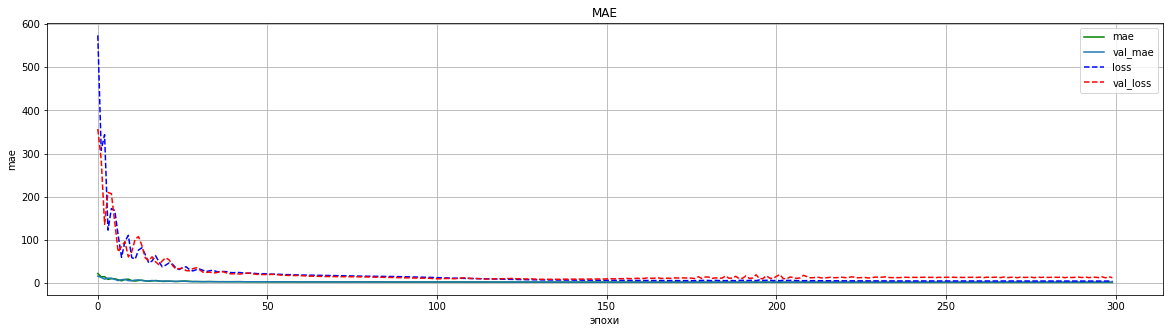

In [31]:
model_b5 = tf.keras.Sequential([
    Dense(13, activation = 'relu', input_shape=(13,)),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'linear')
])
model_b5.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mse', metrics=['mae'])
hb5 = model_b5.fit(X_train, y_train, epochs=300, batch_size = 500, validation_split = 0.2, verbose = 0)

plt.figure(figsize=(20,5))
plt.plot(hb5.history['mae'],'g', label = 'mae')
plt.plot(hb5.history['val_mae'], label = 'val_mae')
plt.plot(hb5.history['loss'],'--b', label = 'loss')
plt.plot(hb5.history['val_loss'],'--r', label = 'val_loss')
plt.xlabel('эпохи')
plt.ylabel('mae')
plt.legend()
plt.grid('On')
plt.title('MAE')
plt.show

print(f'MAE:{hb5.history["mae"][-1]}, VAL_MAE:{hb5.history["val_mae"][-1]}, LOSS:{hb5.history["loss"][-1]}, VAL_LOSS:{hb5.history["val_loss"][-1]}') 

In [32]:
print(f'MAE:{hb5.history["mae"][-1]}, VAL_MAE:{hb5.history["val_mae"][-1]}, LOSS:{hb5.history["loss"][-1]}, VAL_LOSS:{hb5.history["val_loss"][-1]}') 
print(f'MAE:{hb2.history["mae"][-1]}, VAL_MAE:{hb2.history["val_mae"][-1]}, LOSS:{hb2.history["loss"][-1]}, VAL_LOSS:{hb2.history["val_loss"][-1]}') 

MAE:1.5693566799163818, VAL_MAE:2.4181997776031494, LOSS:4.748705863952637, VAL_LOSS:12.548819541931152
MAE:1.734480619430542, VAL_MAE:2.4098267555236816, LOSS:5.533041477203369, VAL_LOSS:11.753429412841797


Уменьшение размера пакета не дало существенного улучшения результатов, а по валидационным лоссам оказалось еще и хуже.

Уменьшим количество эпох:

MAE:3.133880853652954, VAL_MAE:3.0216329097747803, LOSS:19.27836799621582, VAL_LOSS:16.35433578491211


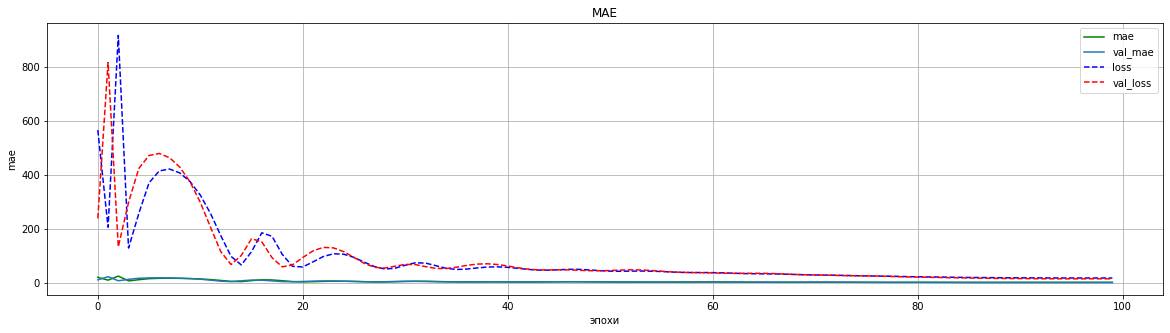

In [33]:
model_b6 = tf.keras.Sequential([
    Dense(13, activation = 'relu', input_shape=(13,)),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'linear')
])
model_b6.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mse', metrics=['mae'])
hb6 = model_b6.fit(X_train, y_train, epochs=100, batch_size = 2000, validation_split = 0.2, verbose = 0)

plt.figure(figsize=(20,5))
plt.plot(hb6.history['mae'],'g', label = 'mae')
plt.plot(hb6.history['val_mae'], label = 'val_mae')
plt.plot(hb6.history['loss'],'--b', label = 'loss')
plt.plot(hb6.history['val_loss'],'--r', label = 'val_loss')
plt.xlabel('эпохи')
plt.ylabel('mae')
plt.legend()
plt.grid('On')
plt.title('MAE')
plt.show

print(f'MAE:{hb6.history["mae"][-1]}, VAL_MAE:{hb6.history["val_mae"][-1]}, LOSS:{hb6.history["loss"][-1]}, VAL_LOSS:{hb6.history["val_loss"][-1]}') 

Уменьшение количества эпох при полученных ранее оптимальных параметрах в эксперименте №2 (hb2.history) ожидаемо дало ухудшуние результата.

Увеличим количество эпох с 300 до 5000:

In [35]:
model_b7 = tf.keras.Sequential([
    Dense(13, activation = 'relu', input_shape=(13,)),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'linear')
])
model_b7.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mse', metrics=['mae'])
hb7 = model_b7.fit(X_train, y_train, epochs=5000, batch_size = 2000, validation_split = 0.2, verbose = 0)

print(f'MAE:{hb2.history["mae"][-1]}, VAL_MAE:{hb2.history["val_mae"][-1]}, LOSS:{hb2.history["loss"][-1]}, VAL_LOSS:{hb2.history["val_loss"][-1]}')
print(f'MAE:{hb7.history["mae"][-1]}, VAL_MAE:{hb7.history["val_mae"][-1]}, LOSS:{hb7.history["loss"][-1]}, VAL_LOSS:{hb7.history["val_loss"][-1]}') 

MAE:1.734480619430542, VAL_MAE:2.4098267555236816, LOSS:5.533041477203369, VAL_LOSS:11.753429412841797
MAE:1.8092408180236816, VAL_MAE:3.318279504776001, LOSS:7.279454708099365, VAL_LOSS:19.05751609802246


Увеличение количество эпох не смолго улучшить результат.

Попробуем поэкспериментировать со слоями нейронной сети:

In [55]:
model_b8 = tf.keras.Sequential([
    Dense(13, activation = 'relu', input_shape=(13,)),
    Dense(256, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'linear')
])
model_b8.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mse', metrics=['mae'])
hb8 = model_b8.fit(X_train, y_train, epochs=300, batch_size = 2000, validation_split = 0.2, verbose = 0)

In [56]:
print(f'MAE:{hb2.history["mae"][-1]}, VAL_MAE:{hb2.history["val_mae"][-1]}, LOSS:{hb2.history["loss"][-1]}, VAL_LOSS:{hb2.history["val_loss"][-1]}')
print(f'MAE:{hb8.history["mae"][-1]}, VAL_MAE:{hb8.history["val_mae"][-1]}, LOSS:{hb8.history["loss"][-1]}, VAL_LOSS:{hb8.history["val_loss"][-1]}')

MAE:1.734480619430542, VAL_MAE:2.4098267555236816, LOSS:5.533041477203369, VAL_LOSS:11.753429412841797
MAE:6.607364654541016, VAL_MAE:6.552398204803467, LOSS:84.15693664550781, VAL_LOSS:86.96836853027344


При добавлении еще одного слоя нейросети результат значительно ухудшился. Особенно по потерям MSE. 

Попробуем увеличить число нейронов в слое:

In [68]:
model_b9 = tf.keras.Sequential([
    Dense(13, activation = 'relu', input_shape=(13,)),
    Dense(1024, activation = 'relu'),
    Dense(1, activation = 'linear')
])
model_b9.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mse', metrics=['mae'])
hb9 = model_b9.fit(X_train, y_train, epochs=300, batch_size = 2000, validation_split = 0.2, verbose = 0)

In [70]:
print(f'MAE:{hb2.history["mae"][-1]}, VAL_MAE:{hb2.history["val_mae"][-1]}, LOSS:{hb2.history["loss"][-1]}, VAL_LOSS:{hb2.history["val_loss"][-1]}')
print(f'MAE:{hb9.history["mae"][-1]}, VAL_MAE:{hb9.history["val_mae"][-1]}, LOSS:{hb9.history["loss"][-1]}, VAL_LOSS:{hb9.history["val_loss"][-1]}')

MAE:1.734480619430542, VAL_MAE:2.4098267555236816, LOSS:5.533041477203369, VAL_LOSS:11.753429412841797
MAE:6.607363700866699, VAL_MAE:6.552398204803467, LOSS:84.15693664550781, VAL_LOSS:86.96836853027344


Увеличение числа нейронов привело к аналогичному предыдущему результату.

В последнем эксперменте изменим оптимайзер:

In [83]:
model_b10 = tf.keras.Sequential([
    Dense(13, activation = 'relu', input_shape=(13,)),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'linear')
])
model_b10.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.1), loss='mse', metrics=['mae'])
hb10 = model_b10.fit(X_train, y_train, epochs=300, batch_size = 2000, validation_split = 0.2, verbose = 0)

In [84]:
print(f'MAE:{hb2.history["mae"][-1]}, VAL_MAE:{hb2.history["val_mae"][-1]}, LOSS:{hb2.history["loss"][-1]}, VAL_LOSS:{hb2.history["val_loss"][-1]}')
print(f'MAE:{hb10.history["mae"][-1]}, VAL_MAE:{hb10.history["val_mae"][-1]}, LOSS:{hb10.history["loss"][-1]}, VAL_LOSS:{hb10.history["val_loss"][-1]}')

MAE:1.734480619430542, VAL_MAE:2.4098267555236816, LOSS:5.533041477203369, VAL_LOSS:11.753429412841797
MAE:4.061924457550049, VAL_MAE:4.0216193199157715, LOSS:27.81847381591797, VAL_LOSS:24.11234474182129


Изменение оптимайзера также не смогло улучшить результат.

Итоговая таблица эксперимента с параметрами модели на датасете Boston:

In [141]:
print(f'#1 3 слоя, 256;  Adam(l_rate=0.005); epochs=300;  batch_size=2000:  MAE:{np.round(hb.history["mae"][-1],3)},   VAL_MAE:{np.round(hb.history["val_mae"][-1],3)},  LOSS:{np.round(hb.history["loss"][-1],3)},  VAL_LOSS:{np.round(hb.history["val_loss"][-1],3)}')
print(f'#2 3 слоя, 256;  Adam(l_rate=0.1);   epochs=300;  batch_size=2000:  MAE:{np.round(hb2.history["mae"][-1],3)},   VAL_MAE:{np.round(hb2.history["val_mae"][-1],3)},   LOSS:{np.round(hb2.history["loss"][-1],3)},   VAL_LOSS:{np.round(hb2.history["val_loss"][-1],3)}')
print(f'#3 3 слоя, 256;  Adam(l_rate=0.5);   epochs=300;  batch_size=2000:  MAE:{np.round(hb3.history["mae"][-1],3)},   VAL_MAE:{np.round(hb3.history["val_mae"][-1],3)},  LOSS:{np.round(hb3.history["loss"][-1],3)},  VAL_LOSS:{np.round(hb3.history["val_loss"][-1],3)}')
print(f'#4 3 слоя, 256;  Adam(l_rate=0.1);   epochs=5;    batch_size=2000:  MAE:{np.round(hb4.history["mae"][-1],3)},  VAL_MAE:{np.round(hb4.history["val_mae"][-1],3)}, LOSS:{np.round(hb4.history["loss"][-1],3)}, VAL_LOSS:{np.round(hb4.history["val_loss"][-1],3)}')
print(f'#5 3 слоя, 256;  Adam(l_rate=0.1);   epochs=300;  batch_size=500:   MAE:{np.round(hb5.history["mae"][-1],3)},   VAL_MAE:{np.round(hb5.history["val_mae"][-1],3)},  LOSS:{np.round(hb5.history["loss"][-1],3)},   VAL_LOSS:{np.round(hb5.history["val_loss"][-1],3)}')
print(f'#6 3 слоя, 256;  Adam(l_rate=0.1);   epochs=100;  batch_size=2000:  MAE:{np.round(hb6.history["mae"][-1],3)},   VAL_MAE:{np.round(hb6.history["val_mae"][-1],3)},  LOSS:{np.round(hb6.history["loss"][-1],3)},  VAL_LOSS:{np.round(hb6.history["val_loss"][-1],3)}')
print(f'#7 3 слоя, 256;  Adam(l_rate=0.1);   epochs=5000; batch_size=2000:  MAE:{np.round(hb7.history["mae"][-1],3)},   VAL_MAE:{np.round(hb7.history["val_mae"][-1],3)},  LOSS:{np.round(hb7.history["loss"][-1],3)},   VAL_LOSS:{np.round(hb7.history["val_loss"][-1],3)}')
print(f'#8 4 слоя, 256;  Adam(l_rate=0.1);   epochs=300;  batch_size=2000:  MAE:{np.round(hb8.history["mae"][-1],3)},   VAL_MAE:{np.round(hb8.history["val_mae"][-1],3)},  LOSS:{np.round(hb8.history["loss"][-1],3)},  VAL_LOSS:{np.round(hb8.history["val_loss"][-1],3)}')
print(f'#9 3 слоя, 1024; Adam(l_rate=0.1);   epochs=300;  batch_size=2000:  MAE:{np.round(hb9.history["mae"][-1],3)},   VAL_MAE:{np.round(hb9.history["val_mae"][-1],3)},  LOSS:{np.round(hb9.history["loss"][-1],3)},  VAL_LOSS:{np.round(hb9.history["val_loss"][-1],3)}')
print(f'#10 3 слоя, 256; Nadam(l_rate=0.1);  epochs=300;  batch_size=2000:  MAE:{np.round(hb10.history["mae"][-1],3)},   VAL_MAE:{np.round(hb10.history["val_mae"][-1],3)},  LOSS:{np.round(hb10.history["loss"][-1],3)},  VAL_LOSS:{np.round(hb10.history["val_loss"][-1],3)}')

#1 3 слоя, 256;  Adam(l_rate=0.005); epochs=300;  batch_size=2000:  MAE:2.295,   VAL_MAE:2.656,  LOSS:11.567,  VAL_LOSS:15.354
#2 3 слоя, 256;  Adam(l_rate=0.1);   epochs=300;  batch_size=2000:  MAE:1.734,   VAL_MAE:2.41,   LOSS:5.533,   VAL_LOSS:11.753
#3 3 слоя, 256;  Adam(l_rate=0.5);   epochs=300;  batch_size=2000:  MAE:6.607,   VAL_MAE:6.552,  LOSS:84.157,  VAL_LOSS:86.968
#4 3 слоя, 256;  Adam(l_rate=0.1);   epochs=5;    batch_size=2000:  MAE:13.255,  VAL_MAE:18.523, LOSS:256.604, VAL_LOSS:423.27
#5 3 слоя, 256;  Adam(l_rate=0.1);   epochs=300;  batch_size=500:   MAE:1.569,   VAL_MAE:2.418,  LOSS:4.749,   VAL_LOSS:12.549
#6 3 слоя, 256;  Adam(l_rate=0.1);   epochs=100;  batch_size=2000:  MAE:3.134,   VAL_MAE:3.022,  LOSS:19.278,  VAL_LOSS:16.354
#7 3 слоя, 256;  Adam(l_rate=0.1);   epochs=5000; batch_size=2000:  MAE:1.809,   VAL_MAE:3.318,  LOSS:7.279,   VAL_LOSS:19.058
#8 4 слоя, 256;  Adam(l_rate=0.1);   epochs=300;  batch_size=2000:  MAE:6.607,   VAL_MAE:6.552,  LOSS:84.157,  

Победителями становятся эксперименты №2 и №5 с приблизительно одинаковыми результатами метрик, отличающиеся только размером пакета.